# Midterm 1 Review

<hr/>

In [9]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for pretty plots
import seaborn as sns
sns.set()

# Fourth-order Runge-Kutta method

Lastly, an even more nuanced approximation would incorporate even more points, such as the fourth-order Runge-Kutta method. Here we start to see the trade-off between the number of calculations required and the quality of the approximation. While Runge-Kutta will perform better the the Euler method, it require a total of five calculations for every time step. For this problem, the additional computation won't be that noticeable, this may be something you have to consider for more complicated problems. 

In general for a differential equation $f(x)$, the approximation for $x$ at time $t + \Delta t$ is computed as follows

$$k_1=f\left(x_t\right) \Delta t$$

$$k_2=f\left(x_t+\frac{1}{2} k_1\right) \Delta t $$

$$k_3=f\left(x_t+\frac{1}{2} k_2\right) \Delta t$$

$$k_4=f\left(x_t+k_3\right) \Delta t $$

$$x_{t+\Delta t} = x_t + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

## Re-vamped version

This notation was a little confusing, with $f(x)$ being a generic term, but our specific case using different terminology. Also, this approach gets even more confusing for more complicated functions such as logistic growth. In this case, let's consider the function $f(N)$, which will be the differential equation for logistic growth:

$$f(N) = \dot N = rN \left(1 - \frac{N}{K} \right).$$

So this function takes in a value of $N$ and returns the value of derivative, at that value of $N$. So below, I flesh out a more explicit version of the Runge-Kutta approximation in this case:

$$ a = f(N_t) \Delta t$$

$$ N_a = N_t + \frac{1}{2}a$$

$$ b = f(N_a) \Delta t$$

$$ N_b = N_t + \frac{1}{2}b$$

$$ c = f(N_b) \Delta t$$

$$ N_c = N_t + c$$

$$ d = f(N_c) \Delta t$$

$$N_{t+\Delta t} = N_t + \frac{1}{6}(a + 2b + 2c + d)$$

Throughout, $N_t$ is our current value of $N,$ which we get from our array at `N[t]`. The values $a, b, c,$ and $d$ are all estimates of the predicted change in $N,$ each found by evaluating $f(N)$ at a different value of $N.$ This is what makes this a **higher-order approximation**, as we are using multiple locations to arrive at our final approximation. Using those values of $a, b, c,$ and $d$ we arrive at more and more precise estimates of $N$ along way: $N_a,$ $N_b,$ and $N_c.$ Ultimately, all these pieces come together to form our final approximation of $N$ in the future, $N_{t+\Delta t}$.

Use this as a guide to compute the Runge-Kutta approximation for logistic growth:

In [10]:
# parameters of the model
K = 1000
r = 0.5
N_0 = 2

# parameters for our integration
dt = 1 # min
total_time = 25 # min

# number of steps that will be taken
num_steps = int(total_time/dt)

# initilize an array of length num_steps into which to store values of N
N = np.zeros(num_steps)
N[0] = N_0

In [11]:
# numerically integrate by looping through N
for t in range(0,num_steps-1):
    

SyntaxError: unexpected EOF while parsing (3781181443.py, line 2)

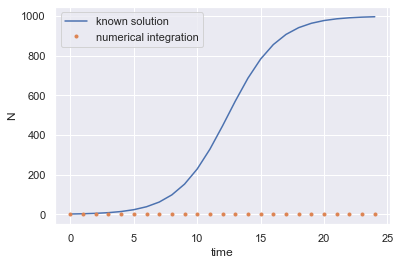

In [12]:
times = np.arange(num_steps)*dt

soln_top = K*N_0*np.exp(r*times)
soln_bottom = K - N_0*(1-np.exp(r*times))
soln = soln_top / soln_bottom

plt.plot(times,soln,'-')
plt.plot(times,N,'.')
plt.xlabel("time")
plt.ylabel("N")
plt.legend(["known solution", "numerical integration"])